In [36]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import modules from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [37]:
# load and convert the data into a dataframe
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data', header=None, names = col_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
# look at the distribution of income
df.income.value_counts(normalize=True)

# strip the whitespaces from the object typed columns
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()

In [39]:
# create dummy variables for categorical features
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race']
X = pd.get_dummies(df[feature_cols], drop_first=True)

# create the output with <=50k to 0 and >50k to 1
y = pd.DataFrame(np.where(df['income'] == '>50K', 1, 0))

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
# create a random forest classifier object
rf = RandomForestClassifier()

# fit the model on the training data
rf.fit(X_train, y_train)

# calculate the score
print(f"Accuracy Score for Default Random Forest: {round(rf.score(X_test, y_test)*100, 3)}%")

Accuracy Score for Default Random Forest: 80.9%


In [41]:
# tune the hyperparameters
accuracy_train = []
accuracy_test = []
depth = range(1, 26)
for i in depth:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(X_train, y_train)
    acc_train = accuracy_score(y_train, rf.predict(X_train))
    acc_test = accuracy_score(y_test, rf.predict(X_test))
    accuracy_train.append(acc_train)
    accuracy_test.append(acc_test)

# find the best accuracy and its depth
best_acc = np.max(accuracy_test)
best_depth = depth[np.argmax(accuracy_test)]
print(f"The highest accuracy on the test set is: {round(best_acc*100,3)}%")
print(f"The highest accuracy on the test is achieved when depth: {best_depth}")

The highest accuracy on the test set is: 82.236%
The highest accuracy on the test is achieved when depth: 14


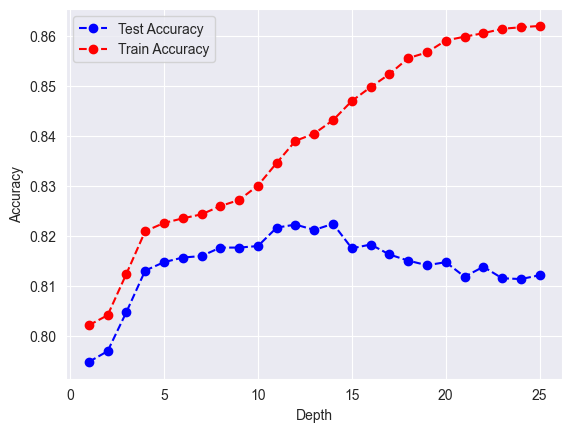

In [42]:
# plot the accuracy of the models vs depths
plt.plot(depth, accuracy_test, "bo--")
plt.plot(depth, accuracy_train, "ro--")
plt.legend(["Test Accuracy", "Train Accuracy"])
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

In [43]:
# refit the random forest classifier using the optimum depth parameter
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(X_train, y_train)

# convert the feature importances into a dataframe
feature_imp_df = pd.DataFrame(zip(X_train.columns, best_rf.feature_importances_), columns=['feature', 'importance'])
print("Top 5 random forest features:")
print(feature_imp_df.sort_values(by='importance', ascending=False).iloc[:5, :])

Top 5 random forest features:
          feature  importance
1    capital-gain    0.346478
0             age    0.260023
3  hours-per-week    0.157621
2    capital-loss    0.130095
4        sex_Male    0.082837
